In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [4]:
df1 = pd.read_csv('sqli.csv' , encoding = 'UTF-16')
df2 = pd.read_csv('sqliv2.csv' , encoding = 'UTF-16')
#df3 = pd.read_csv('SQLiV3.csv' , encoding = 'UTF-16')

In [5]:
df2.head()

,Sentence,Label
0,NaN,1
1,""" or pg_sleep ( __TIME__ ) --",1
2,create user name identified by pass123 tempora...,1
3,%29,1
4,' AND 1 = utl_inaddr.get_host_address ( ( S...,1


In [6]:
df2.shape

(33761, 2)

In [7]:
df1.head()

,Sentence,Label
0,a,1
1,a',1
2,a' --,1
3,a' or 1 = 1; --,1
4,@,1


In [8]:
df1.shape

(4200, 2)

In [9]:
combined_df = pd.concat([df1, df2], ignore_index=True)

In [10]:
combined_df.head()

,Sentence,Label
0,a,1
1,a',1
2,a' --,1
3,a' or 1 = 1; --,1
4,@,1


In [11]:
combined_df.tail()

,Sentence,Label
37956,syrett,0
37957,arrechea bellveh,0
37958,1664,0
37959,almaluez,0
37960,f6lo40r06,0


In [12]:
combined_df.isnull().sum()

Sentence    17
Label        0
dtype: int64

In [13]:
combined_df.duplicated().sum()

4221

In [14]:
new_df = combined_df.drop_duplicates()

In [15]:
new_df.shape

(33740, 2)

In [16]:
new_df = combined_df.dropna()

In [17]:
new_df.shape

(37944, 2)

In [18]:
new_df.isnull().sum().sum()

0

In [19]:
new_df.duplicated().sum()

4206

In [20]:
new_df = new_df.drop_duplicates()

In [21]:
new_df.shape

(33738, 2)

In [22]:
new_df.duplicated().sum()

0

In [23]:
new_df.isnull().sum().sum()

0

In [24]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33738 entries, 0 to 37960
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  33738 non-null  object
 1   Label     33738 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 790.7+ KB


In [25]:
new_df['Label'].describe()

count    33738.000000
mean         0.338639
std          0.473254
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Label, dtype: float64

In [26]:
unique_label = pd.unique(new_df['Label'])

In [27]:
print('\n'.join(str(l) for l in unique_label))

1
0


In [28]:
new_df[new_df['Label'] == 1].count()

Sentence    11425
Label       11425
dtype: int64

In [29]:
new_df[new_df['Label'] == 0].count()

Sentence    22313
Label       22313
dtype: int64

In [30]:
new_df.shape

(33738, 2)

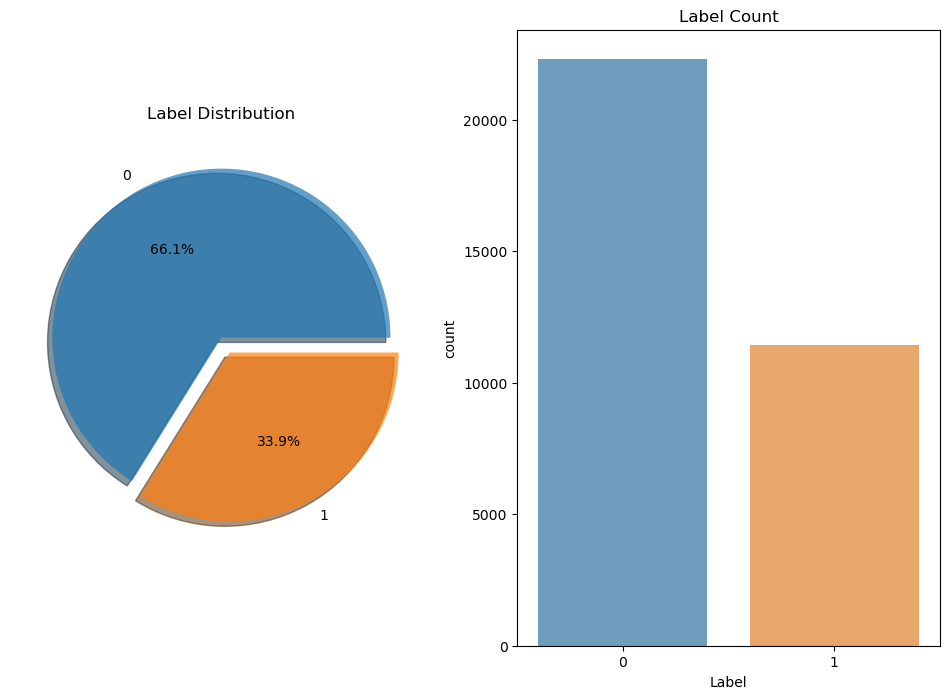

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the cleaned labels
fig, ax = plt.subplots(1, 2, figsize=(12, 8))

# Pie Chart
new_df['Label'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', shadow=True, wedgeprops={'alpha': 0.7}, ax=ax[0])
ax[0].set_title('Label Distribution')
ax[0].set_ylabel('')

# Count Plot
sns.countplot(x='Label', data=new_df, ax=ax[1], alpha=0.7)
ax[1].set_title('Label Count')

plt.show()